<a href="https://colab.research.google.com/github/rahaneom/online-retail-data-analysis/blob/master/Retail_Shop_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl
!pip install fireducks

In [ ]:
%load_ext fireducks.pandas
import pandas as pd
from matplotlib import pyplot as plt

The fireducks.pandas extension is already loaded. To reload it, use:
  %reload_ext fireducks.pandas


In [ ]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-05-22 16:45:45--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip.1’

online+retail.zip.1     [  <=>               ]  22.62M  78.4MB/s    in 0.3s    

2025-05-22 16:45:46 (78.4 MB/s) - ‘online+retail.zip.1’ saved [23715478]



In [ ]:
!unzip online+retail.zip

Archive:  online+retail.zip
replace Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import time
stime = time.time()

In [ ]:
df = pd.read_excel("Online Retail.xlsx", dtype = {'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})

df = pd.concat([df] * 60)

df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(32514540, 8)

In [ ]:
df.info()

<class 'fireducks.pandas.frame.DataFrame'>
Index: 32514540 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   InvoiceNo    object        
 1   StockCode    object        
 2   Description  object        
 3   Quantity     int64         
 4   InvoiceDate  datetime64[ns]
 5   UnitPrice    float64       
 6   CustomerID   float64       
 7   Country      object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.2+ GB


#### Data Cleaning: Handle Missing Values

In [ ]:
df.isnull().sum()

InvoiceNo            0
StockCode            0
Description      87240
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID     8104800
Country              0
dtype: int64

In [ ]:
df[df.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,None,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,None,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,None,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,None,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,None,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,None,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,None,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,None,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,None,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
df[df.StockCode == "22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,None,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,None,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
df[df.StockCode == "22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [ ]:
df[["StockCode", "Description"]].value_counts()

,,count
StockCode,Description,
85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
22423,REGENCY CAKESTAND 3 TIER,2200
85099B,JUMBO BAG RED RETROSPOT,2159
47566,PARTY BUNTING,1727
20725,LUNCH BAG RED RETROSPOT,1638
...,...,...
21491,SET OF THREE VINTAGE GIFT WRAPS,1
84876D,damaged,1
20827,damages,1


In [ ]:
most_freq = df[["StockCode", "Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21491,SET OF THREE VINTAGE GIFT WRAPS,1
4788,84876D,damaged,1
4789,20827,damages,1
4790,20832,check,1


In [ ]:
most_freq[most_freq.StockCode == "85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [ ]:
most_freq = most_freq.groupby("StockCode").head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4755,37503,TEA TIME CAKE STAND IN GIFT BOX,1
4773,37461,FUNKY MONKEY MUG,1
4775,37474,SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
4782,22145,CHRISTMAS CRAFT HEART STOCKING,1


In [ ]:
most_freq.columns = ["StockCode", "FreqDescription", "Count"]

df2 = df.merge(most_freq, on="StockCode",how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,FreqDescription,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [ ]:
df2["Description"] = df2["FreqDescription"]
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,FreqDescription,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [ ]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
FreqDescription,112
Count,112


In [ ]:
df2.dropna(subset = ["Description"], inplace = True)

df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
FreqDescription,0
Count,0


In [ ]:
df2.drop(columns = ["FreqDescription", "Count"], inplace = True)

df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [ ]:
df2[df2.Quantity < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
df3 = df2[(df2.Quantity > 0) & (df2.UnitPrice > 0)]

df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [ ]:
df3.Quantity.quantile(0.9999)

np.float64(1439.8763999990188)

In [ ]:
df3[df3.Quantity > 1500]   # Seems acceptable as these can the huge wholesale orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,15749.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,16333.0,United Kingdom
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00,0.94,16029.0,United Kingdom


#### Feature Engineering: Create New Columns

In [ ]:
df4 = df3.copy()
df4['TotalPrice'] = df4['Quantity'] * df4['UnitPrice']

df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df4.info()  # checking the data type of the InvoiceDate column

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  string        
 1   StockCode    530104 non-null  string        
 2   Description  530104 non-null  string        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  string        
 8   TotalPrice   530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 40.4 MB


In [ ]:
# creating a separate month column
df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
170108,551277,22296,HEART IVORY TRELLIS LARGE,1,2011-04-27 13:06:00,1.65,13637.0,United Kingdom,1.65,4
491395,578067,23570,TRADITIONAL PICK UP STICKS GAME,2,2011-11-22 15:43:00,2.46,NaN,United Kingdom,4.92,11
337957,566486,23214,JINGLE BELL HEART ANTIQUE GOLD,24,2011-09-13 09:59:00,2.08,16098.0,United Kingdom,49.92,9
316819,564756,22628,PICNIC BOXES SET OF 3 RETROSPOT,1,2011-08-30 10:33:00,9.96,NaN,United Kingdom,9.96,8
247515,558772,23199,JUMBO BAG APPLES,2,2011-07-03 16:00:00,2.08,15007.0,United Kingdom,4.16,7


In [ ]:
df4.columns = ["InvoiceNo",	"StockCode",	"Description",	"Quantity",	"InvoiceDate",	"UnitPrice",	"CustomerID",	"Country",	"TotalSales",	"Month"]

df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


#### Visualization & EDA

##### 1. Plot Monthly Sales

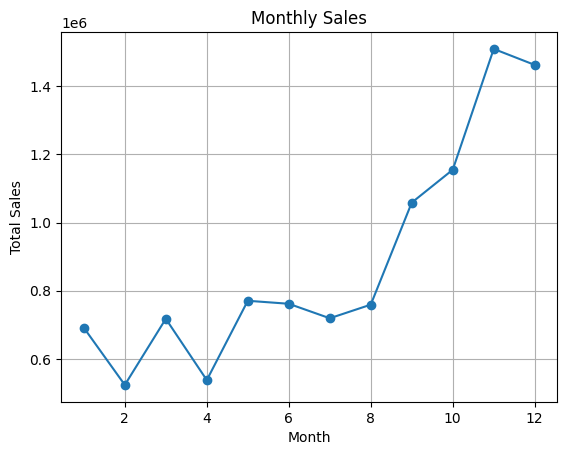

In [ ]:
monthly_sales = df4.groupby("Month")["TotalSales"].sum()

monthly_sales.plot(kind="line", title="Monthly Sales", marker="o")

plt.xlabel("Month")
plt.ylabel("Total Sales")

plt.grid()
plt.show()

**Insights**

Total Sales started rising up in August having a peek in November. This is likely due to the holiday season at the year end.

##### 2. Top 5 Countries

In [ ]:
# prompt: plot horizontal bar chart for top 5 countries by total sales

top_5_countries = df4.groupby("Country")["TotalSales"].sum().sort_values(ascending=False).head()

top_5_countries

,TotalSales
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


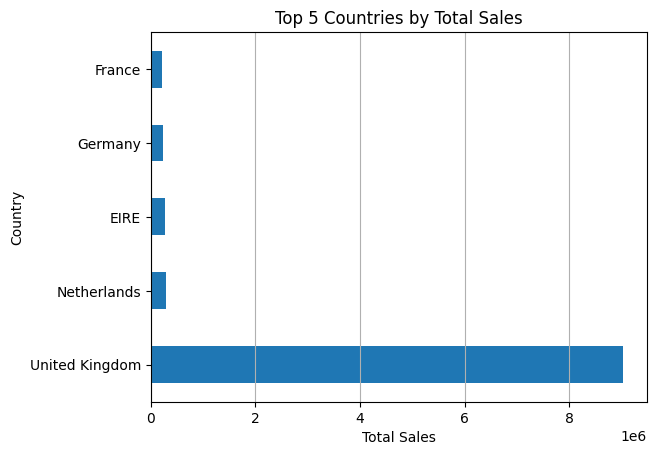

In [ ]:
top_5_countries.plot(kind="barh", title="Top 5 Countries by Total Sales")

plt.xlabel("Total Sales")
plt.ylabel("Country")

plt.grid(axis='x')
plt.show()

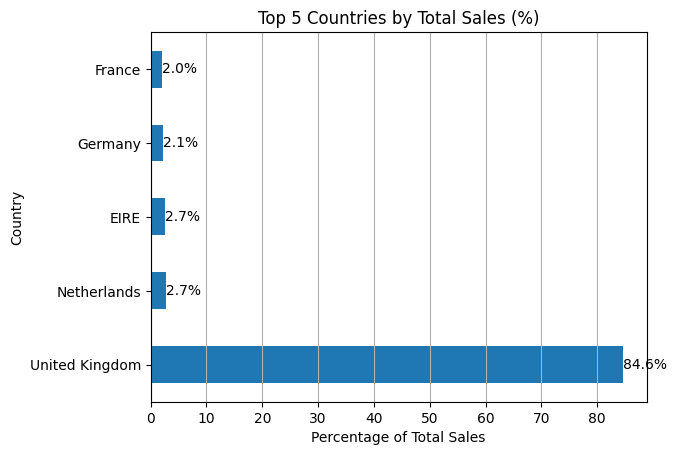

In [ ]:
# prompt: Use same chart but use percentage contribution. Show % on the bar

country_wise_sales = df4.groupby("Country")["TotalSales"].sum()
total_sales = country_wise_sales.sum()

top_5_contries = country_wise_sales.sort_values(ascending=False).head()

top_5_countries_percentage = (top_5_countries / total_sales) * 100

ax = top_5_countries_percentage.plot(kind="barh", title="Top 5 Countries by Total Sales (%)")

plt.xlabel("Percentage of Total Sales")
plt.ylabel("Country")

plt.grid(axis='x')

# Add percentage labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

In [ ]:
product_wise_sales = df4.groupby("StockCode")["TotalSales"].sum()

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)

top_5_products

,TotalSales
StockCode,
DOT,206248.77
22423,174484.74
23843,168469.60
85123A,104518.80
47566,99504.33


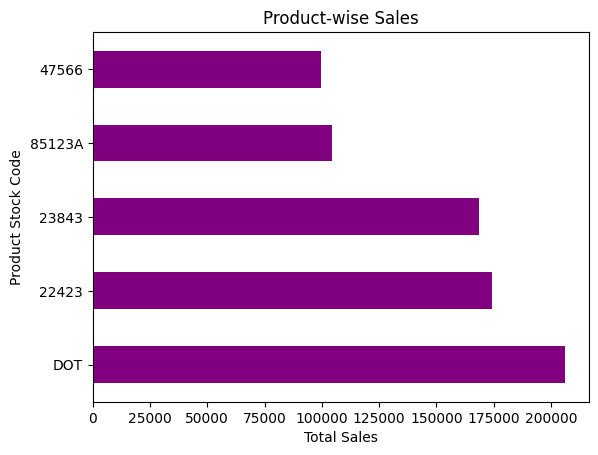

In [ ]:
top_5_products.plot(kind="barh", title="Product-wise Sales", color="purple")

plt.xlabel("Total Sales")
plt.ylabel("Product Stock Code")

plt.show()


In [ ]:
df4[df4.StockCode == "DOT"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,12
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,12
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,12
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06,12
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47,12
...,...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,1008.96,12
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,1683.75,12
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,938.59,12
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,933.17,12


In [ ]:
for stock_code in top_5_products.index:
    description = df4[df4.StockCode == stock_code].Description.iloc[0]
    print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


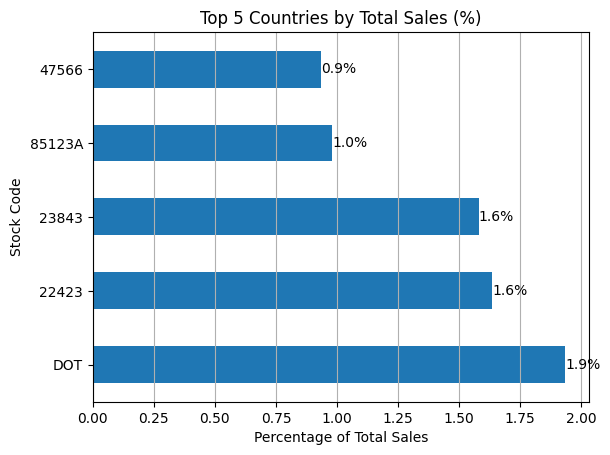

In [ ]:
# prompt: same chart but using percentage . show % on each bar

total_sales = product_wise_sales.sum()
percentages = (top_5_products / total_sales) * 100

ax = percentages.plot(kind="barh", title="Top 5 Countries by Total Sales (%)")

plt.xlabel("Percentage of Total Sales")
plt.ylabel("Stock Code")

plt.grid(axis='x')

# Add percentage labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

##### 4. RFM Analysis - Recency, Frequency, Monetary

In [ ]:
current_dt = df4.InvoiceDate.max()
current_dt

Timestamp('2011-12-09 12:50:00')

In [ ]:
current_dt = df4.InvoiceDate.max() + pd.Timedelta(days = 1)
current_dt

Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm = df4.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (current_dt - x.max()).days,
    "InvoiceNo": "count",
    "TotalSales": "sum"
})

rfm.columns = ["Recency", "Frequency", "Monetary"]

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [ ]:
df4[df4.CustomerID == 12347]["TotalSales"].sum()

np.float64(4310.000000000001)

In [ ]:
# Segmenting and Scoring Customers based on RFM Values

rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, [4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'],4 , [1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, [1, 2, 3, 4])

rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)

rfm

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,6
12347.0,1,182,4310.00,4,4,4,12
12348.0,74,31,1797.24,2,2,4,8
12349.0,18,73,1757.55,3,3,4,10
12350.0,309,17,334.40,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,3
18281.0,180,7,80.82,1,1,1,3
18282.0,7,12,178.05,4,1,1,6


In [ ]:
rfm.sort_values('RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18283.0,3,756,2094.88,4,4,4,12
18245.0,6,175,2567.06,4,4,4,12
18241.0,9,104,2073.09,4,4,4,12
18229.0,11,164,7276.90,4,4,4,12
18225.0,2,271,5509.12,4,4,4,12
...,...,...,...,...,...,...,...
16471.0,274,13,223.95,1,1,1,3
18224.0,263,10,158.95,1,1,1,3
18220.0,226,2,305.28,1,1,1,3


In [ ]:
def churn_risk(score):
    if score >= 10:
        return 'Low Risk'
    elif score >= 6:
        return 'Medium Risk'
    else:
        return 'High Risk'

rfm['Churn_Risk'] = rfm['RFM_Score'].apply(churn_risk)
rfm

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score,Churn_Risk
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,6,Medium Risk
12347.0,1,182,4310.00,4,4,4,12,Low Risk
12348.0,74,31,1797.24,2,2,4,8,Medium Risk
12349.0,18,73,1757.55,3,3,4,10,Low Risk
12350.0,309,17,334.40,1,1,2,4,High Risk
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,3,High Risk
18281.0,180,7,80.82,1,1,1,3,High Risk
18282.0,7,12,178.05,4,1,1,6,Medium Risk


In [ ]:
# Count number of customers with High Risk (likely churned)
# num_churned_customers = rfm[rfm['Churn_Risk'] == 'High Risk'].shape[0]
# shape[0] gives the first row
# print("Number of churned customers (High Risk):", num_churned_customers)

num_churned_customers = len(rfm[rfm['Churn_Risk'] == 'High Risk'])
print("Number of churned customers (High Risk):", num_churned_customers)

Number of churned customers (High Risk): 1283


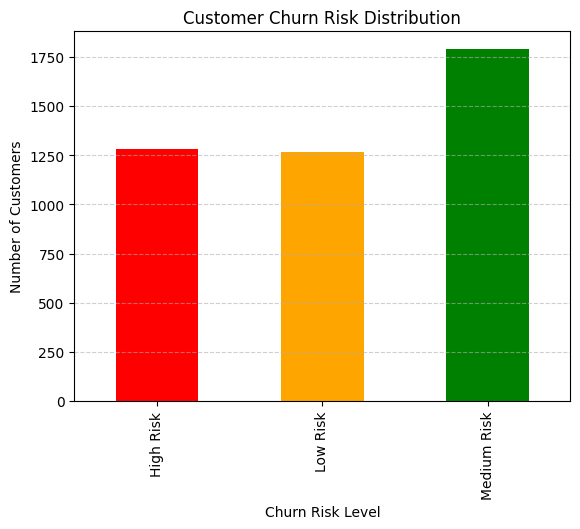

In [ ]:
rfm['Churn_Risk'].value_counts().sort_index().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title("Customer Churn Risk Distribution")
plt.xlabel("Churn Risk Level")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
print(f"[{pd.__name__}] total time taken: {time.time() - stime} sec")

[fireducks.pandas] total time taken: 77.09082245826721 sec


In [ ]:
# without using Fireducks, the time taken is 205 seconds